In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
filename_1 = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"  
filename_2 = "YO_CLEANED/FMLV50W.txt"
dirty = pd.read_csv(filename_1)
#cleaned = pd.read_csv(filename_2, delim_whitespace=True)
cleaned = pd.read_csv(filename_2, sep=r'\s+', engine='python', header =None)

In [78]:
dirty

,Time,RtoR
0,NaN,17729
1,NaN,13114
2,NaN,253
3,NaN,3176
4,NaN,10164
...,...,...
2219,NaN,855
2220,NaN,3246
2221,NaN,785
2222,NaN,400


In [79]:
cleaned

,0,1
0,0.009633,0.0
1,0.023367,824.0
2,0.226633,0.0
3,0.230050,0.0
4,0.252633,1355.0
...,...,...
2070,31.516883,855.0
2071,31.570983,0.0
2072,31.584067,785.0
2073,31.590733,0.0


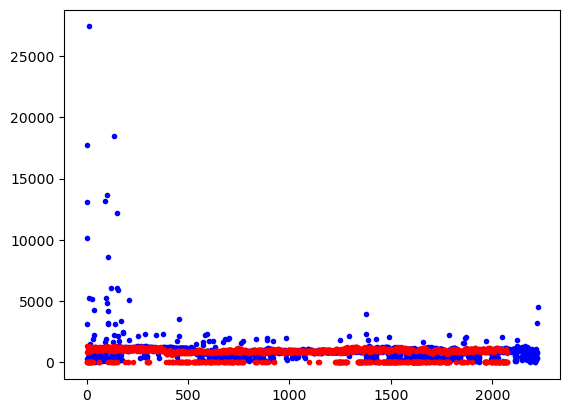

In [84]:
plt.plot(dirty['RtoR'], marker='.', linestyle = '', color = 'blue')
plt.plot(cleaned[1], marker='.', linestyle = '',color = 'red')
#plt.ylim(600,1500)
#plt.xlim(0,1000)
plt.show()

In [62]:
dirty['RtoR'] = dirty['RtoR'].where(dirty['RtoR'] <= 1500)
dirty['RtoR'] = dirty['RtoR'].where(dirty['RtoR'] >= 600)

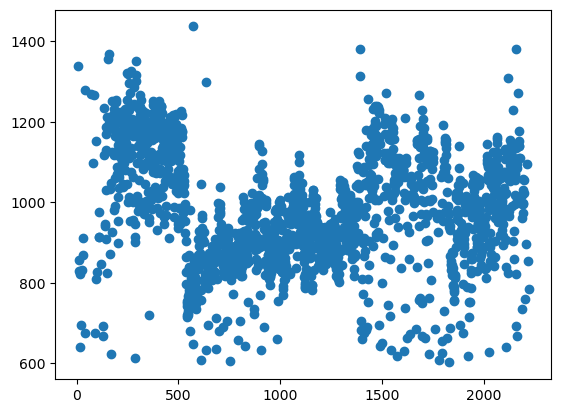

In [63]:
plt.plot(dirty['RtoR'], marker='o', linestyle = '')
plt.show()

In [64]:
cleaned[1] = cleaned[1].where(cleaned[1] != 0 )

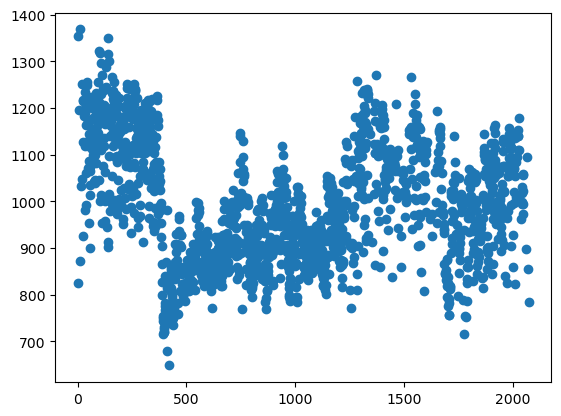

In [65]:
plt.plot(cleaned[1], marker='o', linestyle = '')
plt.show()

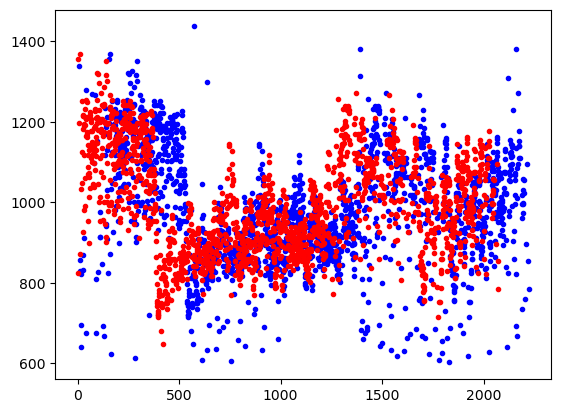

In [66]:
plt.plot(dirty['RtoR'], marker='.', linestyle = '', color = 'blue')
plt.plot(cleaned[1], marker='.', linestyle = '',color = 'red')
plt.show()

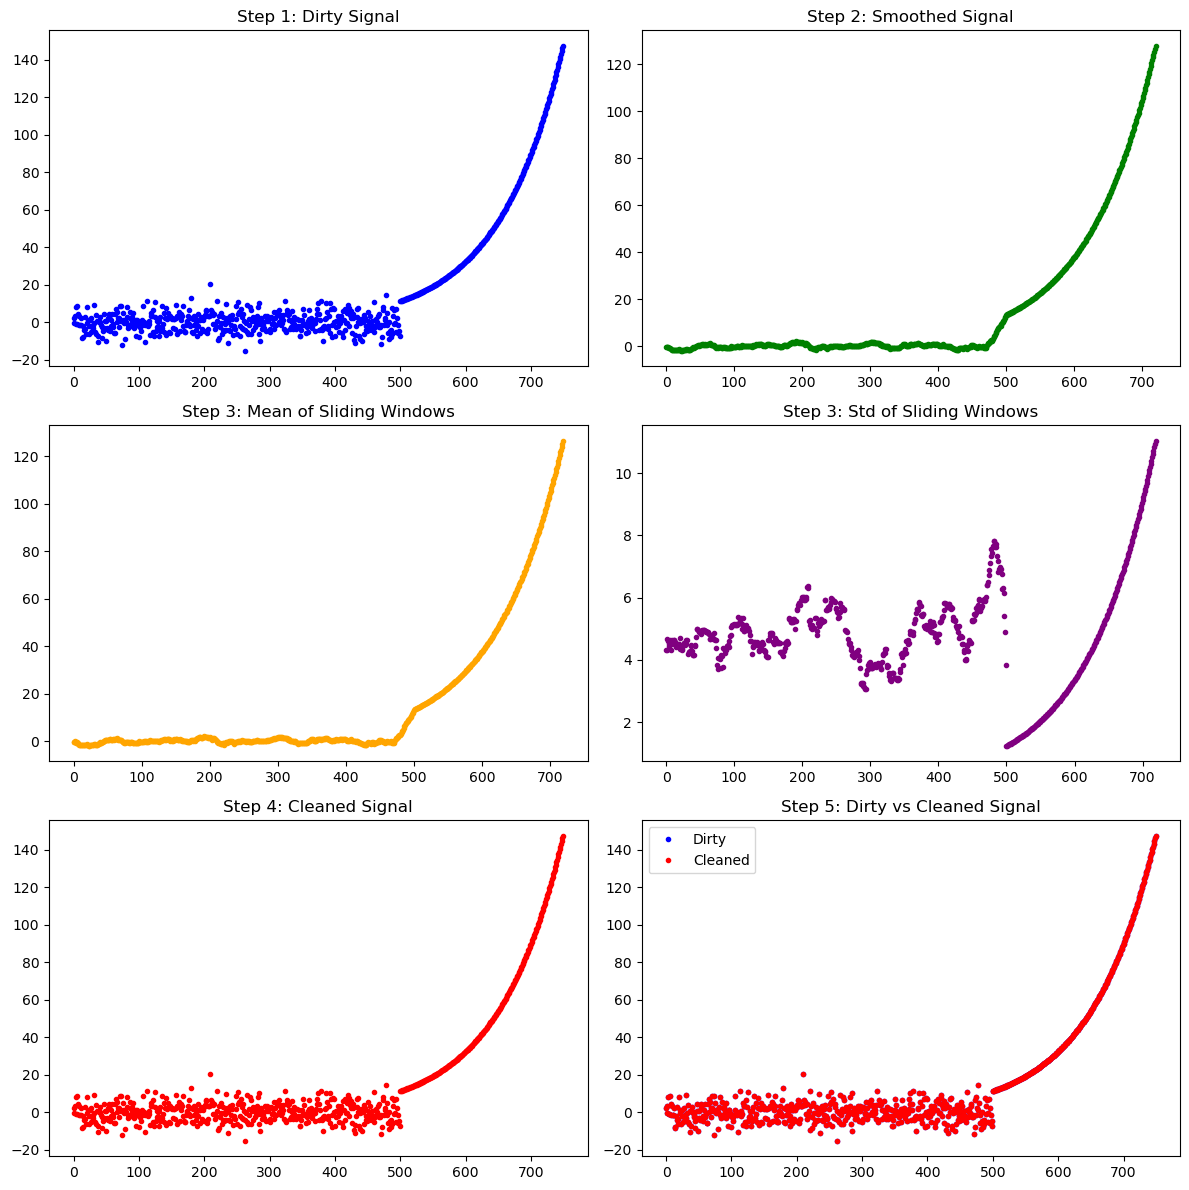

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Generate dummy data
np.random.seed(42)  # For reproducibility

# Create a noisy signal (dirty)
time = np.linspace(0, 1000, 1000)
noise = np.random.normal(0, 5, size=len(time))  # High variance noise
signal1 = np.sin(0.1 * time) + noise  # Noisy part 1
signal2 = np.linspace(0, 0, len(time)//2)  # Linear region (second region)
signal3 = np.exp(0.01 * (time - 500)) - 1  # Growing std/mean part

# Combine the regions into one signal
dirty_signal = np.concatenate([signal1[:500], signal2[500:750], signal3[750:]])

# Step 2: Apply smoothing (optional)
smoothed_signal = np.convolve(dirty_signal, np.ones(30)/30, mode='valid')

# Step 3: Calculate mean and std in moving windows
window_size = 30
mean_values = [np.mean(dirty_signal[i:i+window_size]) for i in range(len(dirty_signal) - window_size)]
std_values = [np.std(dirty_signal[i:i+window_size]) for i in range(len(dirty_signal) - window_size)]

# Step 4: Clean based on mean and std thresholds
threshold_mean = 0.1
threshold_std = 1
cleaned_signal = dirty_signal.copy()

for i in range(len(mean_values)):
    if abs(mean_values[i]) < threshold_mean and std_values[i] < threshold_std:
        # Mark regions as cleaned
        cleaned_signal[i:i+window_size] = np.median(dirty_signal[i:i+window_size])  # Flatten it out

# Step 5: Plot each step

# Create subplots to show each step
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plot dirty signal
axes[0, 0].plot(dirty_signal, marker='.', linestyle='', color='blue')
axes[0, 0].set_title('Step 1: Dirty Signal')

# Plot smoothed signal
axes[0, 1].plot(smoothed_signal, marker='.', linestyle='', color='green')
axes[0, 1].set_title('Step 2: Smoothed Signal')

# Plot mean values
axes[1, 0].plot(mean_values, marker='.', linestyle='', color='orange')
axes[1, 0].set_title('Step 3: Mean of Sliding Windows')

# Plot std values
axes[1, 1].plot(std_values, marker='.', linestyle='', color='purple')
axes[1, 1].set_title('Step 3: Std of Sliding Windows')

# Plot the thresholded cleaned signal
axes[2, 0].plot(cleaned_signal, marker='.', linestyle='', color='red')
axes[2, 0].set_title('Step 4: Cleaned Signal')

# Plot dirty vs cleaned signal (for comparison)
axes[2, 1].plot(dirty_signal, marker='.', linestyle='', color='blue', label='Dirty')
axes[2, 1].plot(cleaned_signal, marker='.', linestyle='', color='red', label='Cleaned')
axes[2, 1].legend()
axes[2, 1].set_title('Step 5: Dirty vs Cleaned Signal')

plt.tight_layout()
plt.show()


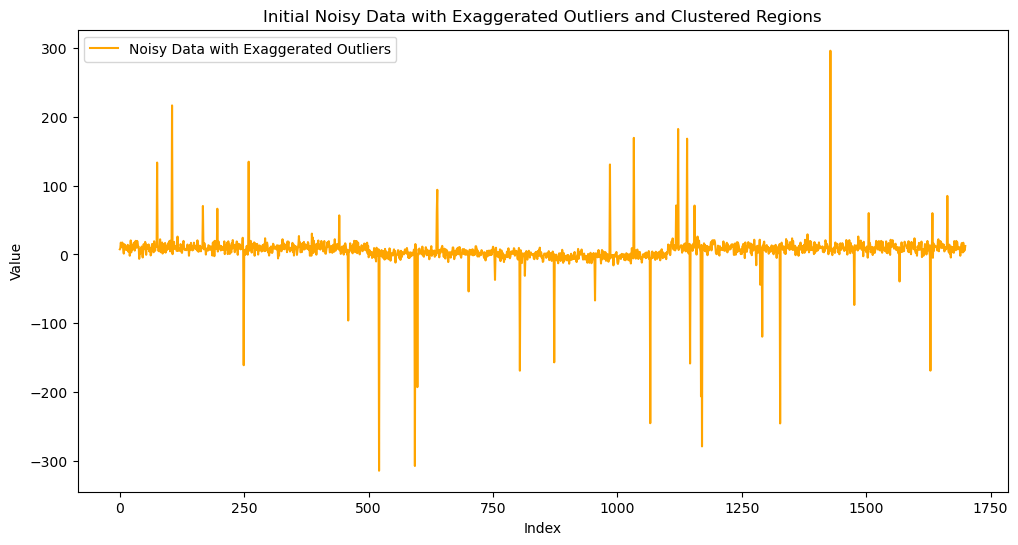

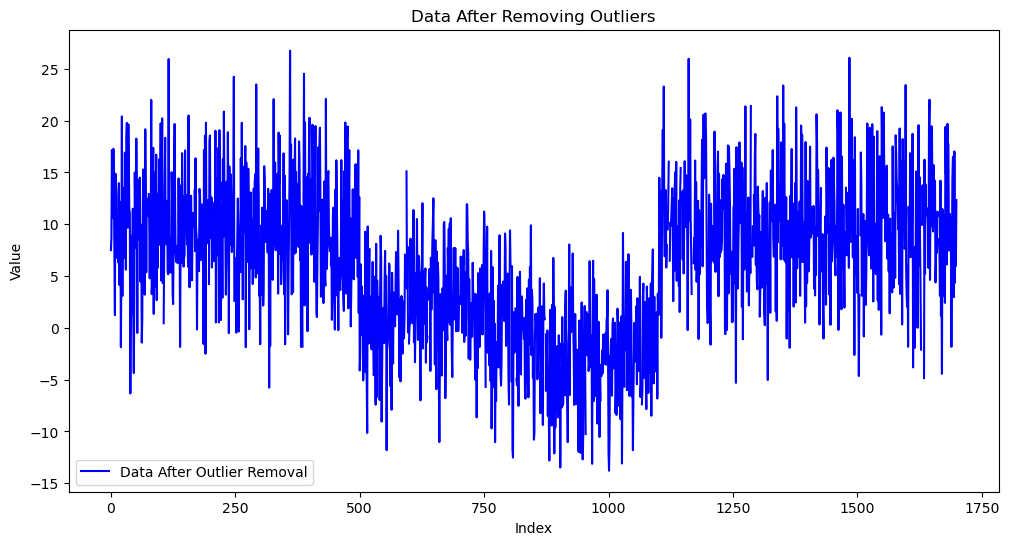

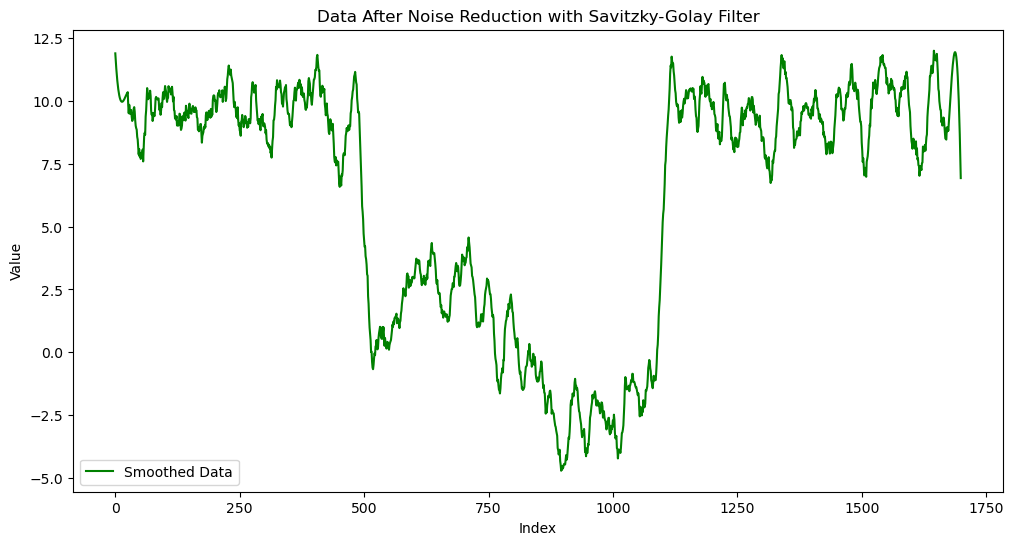

In [86]:





# Step 3: Detect and Remove Outliers using IQR
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(data_noisy, 25)
Q3 = np.percentile(data_noisy, 75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mask the data to remove outliers
data_no_outliers = np.where((data_noisy >= lower_bound) & (data_noisy <= upper_bound), data_noisy, np.nan)

# Plot data after outlier removal
plt.figure(figsize=(12, 6))
plt.plot(data_no_outliers, label="Data After Outlier Removal", color="blue")
plt.title("Data After Removing Outliers")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 4: Apply Savitzky-Golay filter to reduce noise
# Using window length 51 and polynomial order 3 for smoothing
data_smoothed = savgol_filter(np.nan_to_num(data_no_outliers, nan=np.nanmean(data_no_outliers)), window_length=51, polyorder=3)

# Plot data after noise reduction
plt.figure(figsize=(12, 6))
plt.plot(data_smoothed, label="Smoothed Data", color="green")
plt.title("Data After Noise Reduction with Savitzky-Golay Filter")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()


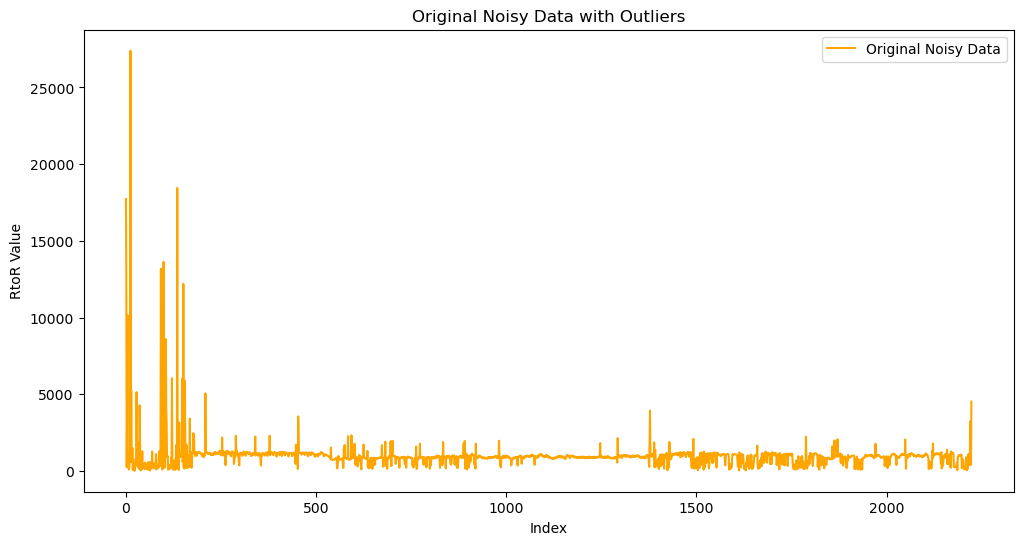

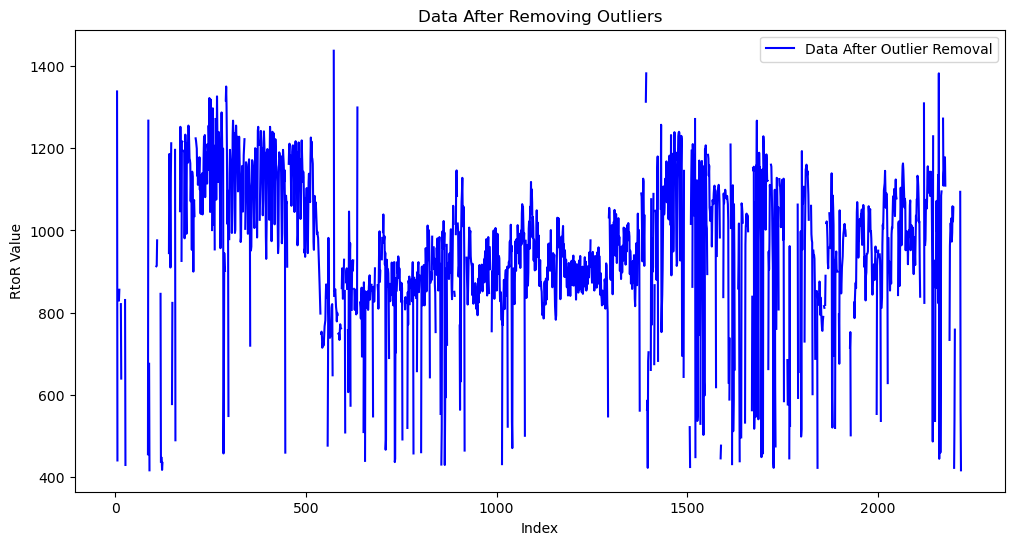

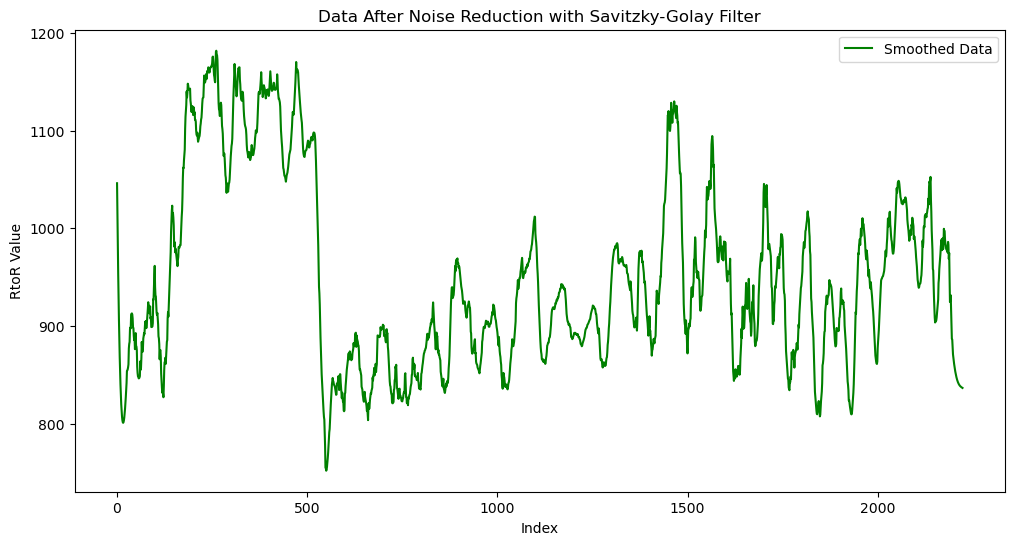

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Assuming your DataFrame is named `df` and the column of interest is 'RtoR'
# Step 1: Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(df['RtoR'], label="Original Noisy Data", color="orange")
plt.title("Original Noisy Data with Outliers")
plt.xlabel("Index")
plt.ylabel("RtoR Value")
plt.legend()
plt.show()

# Step 2: Detect and Remove Outliers using the IQR method
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mask outliers as NaN to exclude them from further analysis
df['RtoR_no_outliers'] = df['RtoR'].where((df['RtoR'] >= lower_bound) & (df['RtoR'] <= upper_bound))

# Plot data after outlier removal
plt.figure(figsize=(12, 6))
plt.plot(df['RtoR_no_outliers'], label="Data After Outlier Removal", color="blue")
plt.title("Data After Removing Outliers")
plt.xlabel("Index")
plt.ylabel("RtoR Value")
plt.legend()
plt.show()

# Step 3: Apply Savitzky-Golay filter for noise reduction
# Convert NaNs to the mean of the non-NaN values in the 'RtoR_no_outliers' column
data_filled = df['RtoR_no_outliers'].fillna(df['RtoR_no_outliers'].mean())
df['RtoR_smoothed'] = savgol_filter(data_filled, window_length=51, polyorder=3)

# Plot the smoothed data
plt.figure(figsize=(12, 6))
plt.plot(df['RtoR_smoothed'], label="Smoothed Data", color="green")
plt.title("Data After Noise Reduction with Savitzky-Golay Filter")
plt.xlabel("Index")
plt.ylabel("RtoR Value")
plt.legend()
plt.show()


In [89]:
filename_1 = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"  
filename_2 = "YO_CLEANED/FMLV50W.txt"
df = pd.read_csv(filename_1)
#cleaned = pd.read_csv(filename_2, delim_whitespace=True)
cleaned = pd.read_csv(filename_2, sep=r'\s+', engine='python', header =None)

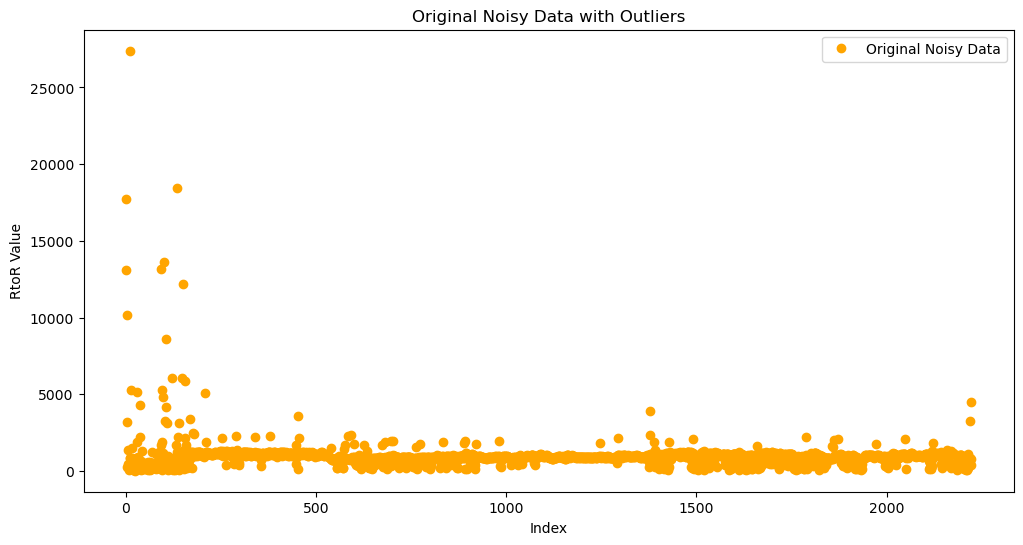

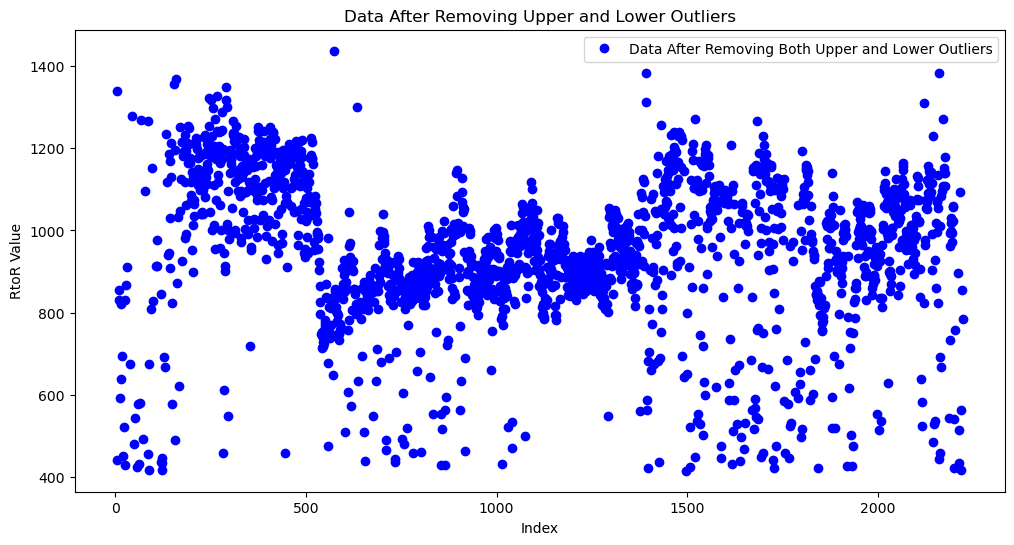

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Assuming your DataFrame is named `df` and the column of interest is 'RtoR'
# Step 1: Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(df['RtoR'], label="Original Noisy Data", color="orange",marker = 'o',linestyle = '')
plt.title("Original Noisy Data with Outliers")
plt.xlabel("Index")
plt.ylabel("RtoR Value")
plt.legend()
plt.show()


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for both lower and upper outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove both upper and lower outliers by setting them as NaN
df['RtoR_no_outliers'] = df['RtoR'].where((df['RtoR'] >= lower_bound) & (df['RtoR'] <= upper_bound))

# Plot data after outlier removal
plt.figure(figsize=(12, 6))
#plt.plot(df['RtoR'], label="Original Data", color="orange", alpha=0.5)
plt.plot(df['RtoR_no_outliers'], label="Data After Removing Both Upper and Lower Outliers", color="blue", marker = 'o',linestyle = '')
plt.title("Data After Removing Upper and Lower Outliers")
plt.xlabel("Index")
plt.ylabel("RtoR Value")
plt.legend()
plt.show()


In [96]:
filename_1 = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"  
filename_2 = "YO_CLEANED/FMLV50W.txt"
df = pd.read_csv(filename_1)
#cleaned = pd.read_csv(filename_2, delim_whitespace=True)
cleaned = pd.read_csv(filename_2, sep=r'\s+', engine='python', header =None)

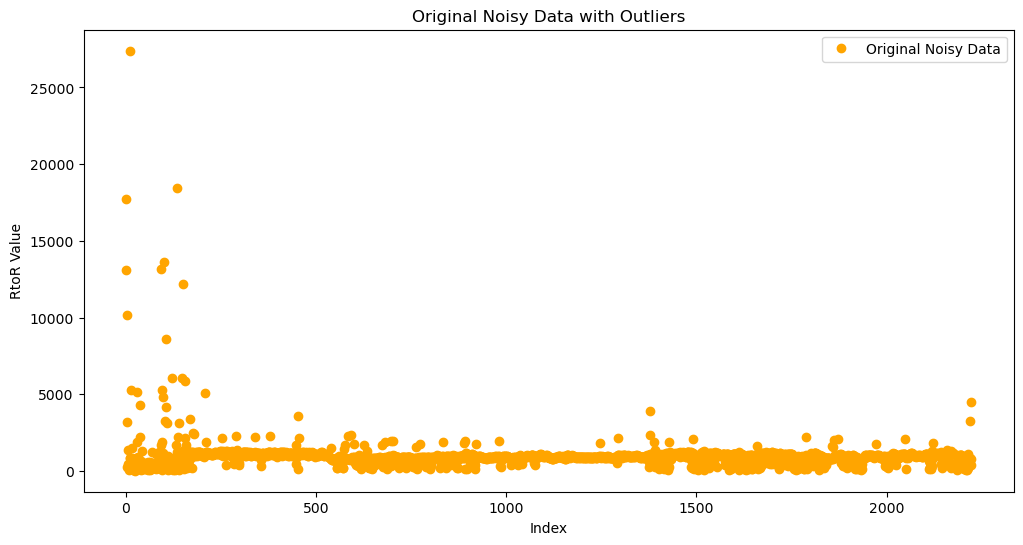

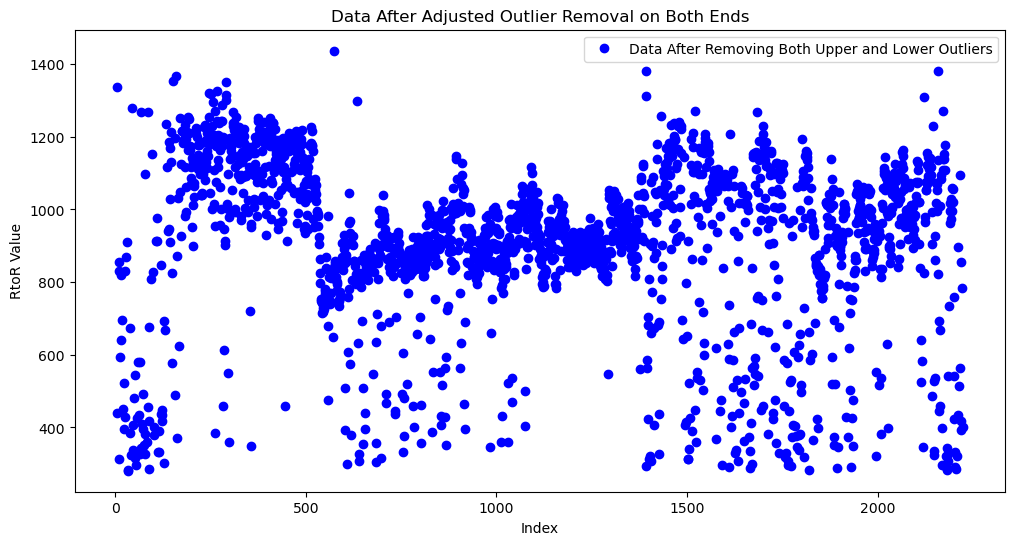

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Assuming your DataFrame is named `df` and the column of interest is 'RtoR'
# Step 1: Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(df['RtoR'], label="Original Noisy Data", color="orange",marker = 'o',linestyle = '')
plt.title("Original Noisy Data with Outliers")
plt.xlabel("Index")
plt.ylabel("RtoR Value")
plt.legend()
plt.show()


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds: using a stricter limit for the lower bound
lower_bound = Q1 - 2 * IQR  # Adjust to a tighter bound for lower outliers
upper_bound = Q3 + 1.5 * IQR

# Mask data points outside of these bounds
df['RtoR_no_outliers'] = df['RtoR'].where((df['RtoR'] >= lower_bound) & (df['RtoR'] <= upper_bound))

# Plot data after applying the modified outlier removal
plt.figure(figsize=(12, 6))
#plt.plot(df['RtoR'], label="Original Data", color="orange", alpha=0.5)
plt.plot(df['RtoR_no_outliers'], label="Data After Removing Both Upper and Lower Outliers", color="blue",marker = 'o',linestyle = '')
plt.title("Data After Adjusted Outlier Removal on Both Ends")
plt.xlabel("Index")
plt.ylabel("RtoR Value")
plt.legend()
plt.show()

In [100]:
filename_1 = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"  
filename_2 = "YO_CLEANED/FMLV50W.txt"
df = pd.read_csv(filename_1)
#cleaned = pd.read_csv(filename_2, delim_whitespace=True)
cleaned = pd.read_csv(filename_2, sep=r'\s+', engine='python', header =None)

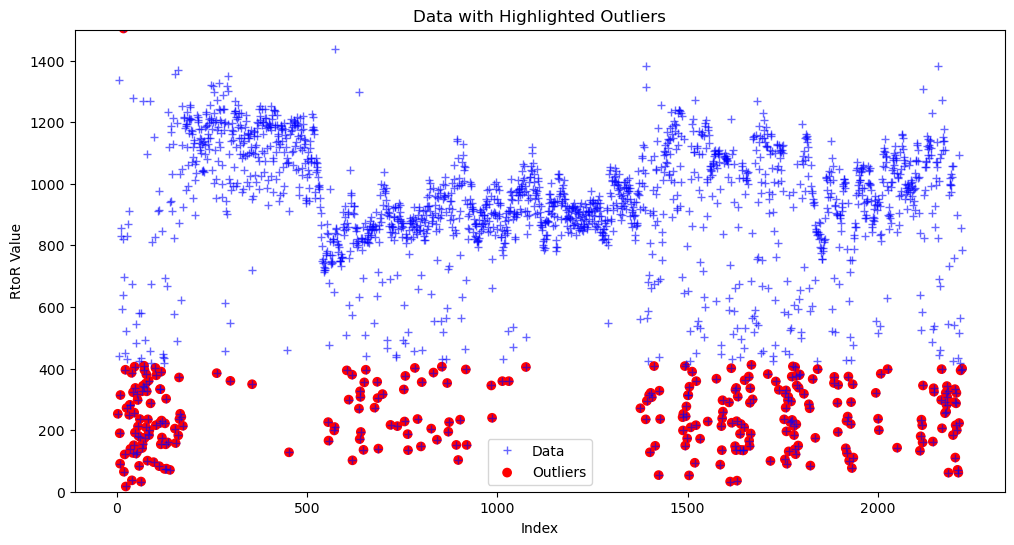

In [105]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Step 1: Calculate z-scores for the 'RtoR' data
df['z_scores'] = zscore(df['RtoR'])

# Define an outlier threshold (±3 standard deviations)
z_threshold = 3

# Step 2: Use IQR to define bounds
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Combine z-score and IQR conditions to identify outliers
outliers = (df['z_scores'].abs() > z_threshold) | (df['RtoR'] < lower_bound) | (df['RtoR'] > upper_bound)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RtoR'], label="Data", color="blue", alpha=0.6, marker = '+', linestyle ='')
plt.scatter(df.index[outliers], df['RtoR'][outliers], color="red", label="Outliers", marker='o', linestyle = '')
plt.title("Data with Highlighted Outliers")
plt.xlabel("Index")
plt.ylabel("RtoR Value")
plt.ylim(0,1500)
plt.legend()
plt.show()


In [106]:
filename_1 = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"  
filename_2 = "YO_CLEANED/FMLV50W.txt"
df = pd.read_csv(filename_1)
#cleaned = pd.read_csv(filename_2, delim_whitespace=True)
cleaned = pd.read_csv(filename_2, sep=r'\s+', engine='python', header =None)

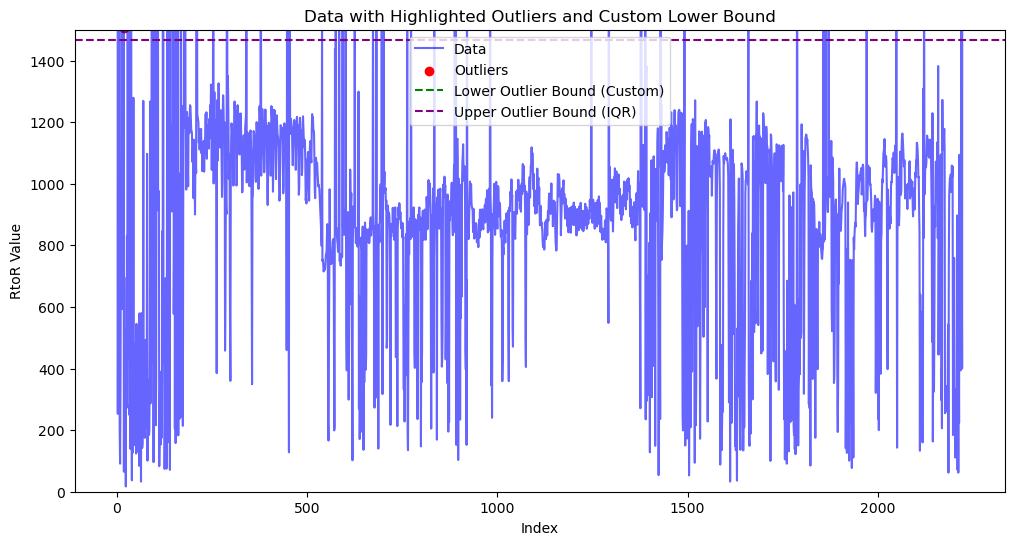

In [108]:
# Assume the first region is roughly the first 500 points
first_region = df['RtoR'].iloc[:500]

# Calculate the lower and upper bounds of this high-density region
first_region_min = first_region.min()
first_region_max = first_region.max()

# Define a custom lower bound to detect outliers that fall significantly below this range
lower_outlier_bound = first_region_min - 0.5 * (first_region_max - first_region_min)

# Also include IQR-based filtering for the overall dataset
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Identify outliers: any points below the custom lower bound or above the IQR-based upper bound
outliers = (df['RtoR'] < lower_outlier_bound) | (df['RtoR'] > upper_bound)

# Plotting with highlighted outliers
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RtoR'], label="Data", color="blue", alpha=0.6)
plt.scatter(df.index[outliers], df['RtoR'][outliers], color="red", label="Outliers", marker='o')
plt.axhline(y=lower_outlier_bound, color='green', linestyle='--', label="Lower Outlier Bound (Custom)")
plt.axhline(y=upper_bound, color='purple', linestyle='--', label="Upper Outlier Bound (IQR)")
plt.title("Data with Highlighted Outliers and Custom Lower Bound")
plt.xlabel("Index")
plt.ylabel("RtoR Value")
plt.ylim(0,1500)
plt.legend()
plt.show()


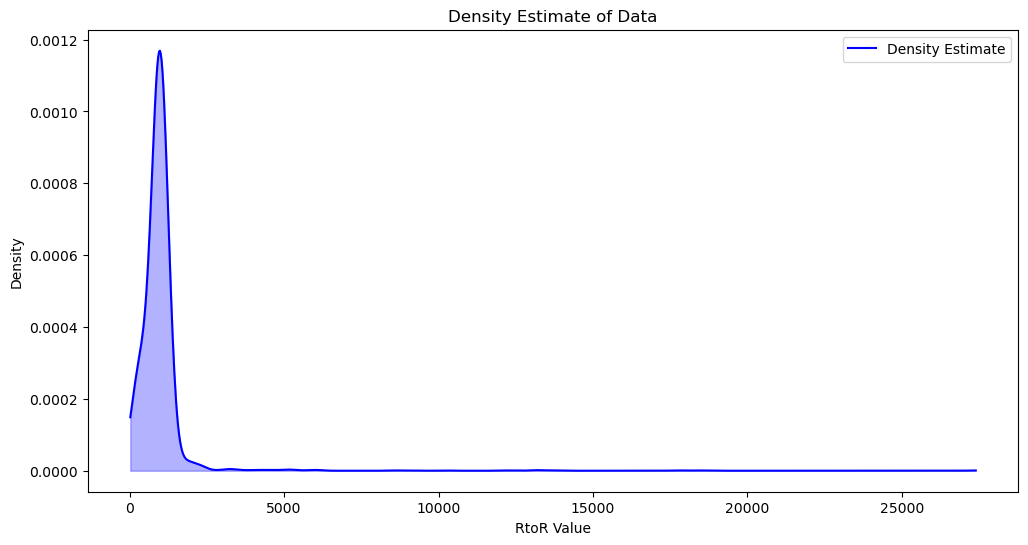

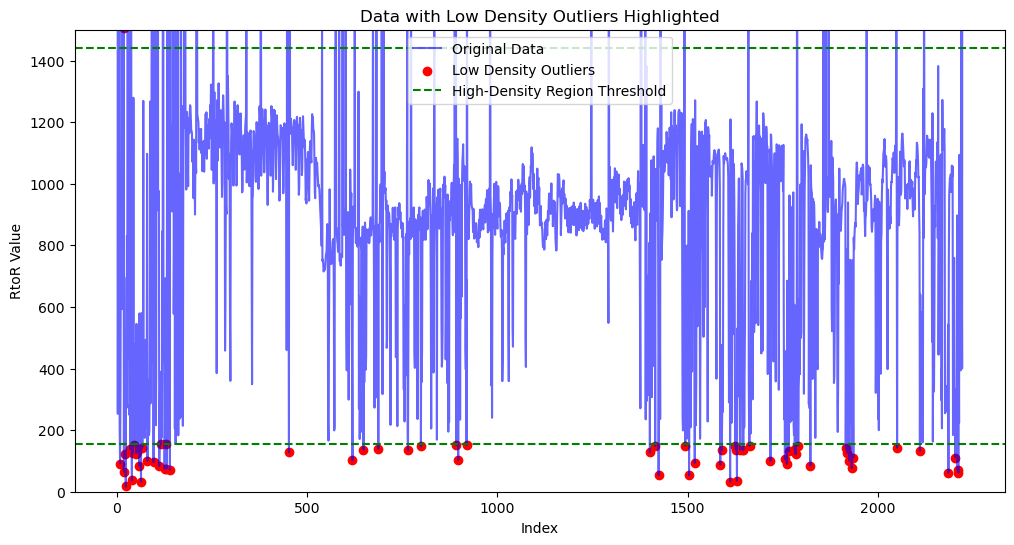

In [110]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Step 1: Estimate the density using Kernel Density Estimation (KDE)
data = df['RtoR'].dropna()  # Remove NaN values if they exist

# Calculate kernel density estimate (KDE)
kde = gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 1000)
density = kde(x_range)

# Step 2: Visualize the density estimate
plt.figure(figsize=(12, 6))
plt.plot(x_range, density, label='Density Estimate', color='blue')
plt.fill_between(x_range, density, color='blue', alpha=0.3)
plt.title("Density Estimate of Data")
plt.xlabel("RtoR Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Step 3: Detect regions with high and low density
# Threshold to detect high-density (region where the density is above a certain value)
high_density_threshold = 0.2 * max(density)

# Mark regions where density is above the threshold
high_density_region = x_range[density > high_density_threshold]

# Step 4: Identify low-density points (outliers) based on this density threshold
# Outliers in low-density regions: values that fall below the density threshold range
low_density_outliers = data[(data < high_density_region.min()) | (data > high_density_region.max())]

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot the original data points
plt.plot(df.index, df['RtoR'], label="Original Data", color="blue", alpha=0.6)

# Highlight the low-density outliers
plt.scatter(df.index[df['RtoR'].isin(low_density_outliers)], low_density_outliers, color="red", label="Low Density Outliers", marker='o')

# Highlight high-density region
plt.axhline(y=high_density_region.min(), color='green', linestyle='--', label="High-Density Region Threshold")
plt.axhline(y=high_density_region.max(), color='green', linestyle='--')

plt.title("Data with Low Density Outliers Highlighted")
plt.xlabel("Index")
plt.ylabel("RtoR Value")
plt.ylim(0,1500)
plt.legend()
plt.show()


/tmp/ipykernel_10190/1591100331.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, cmap="Blues", bw_adjust=0.5)


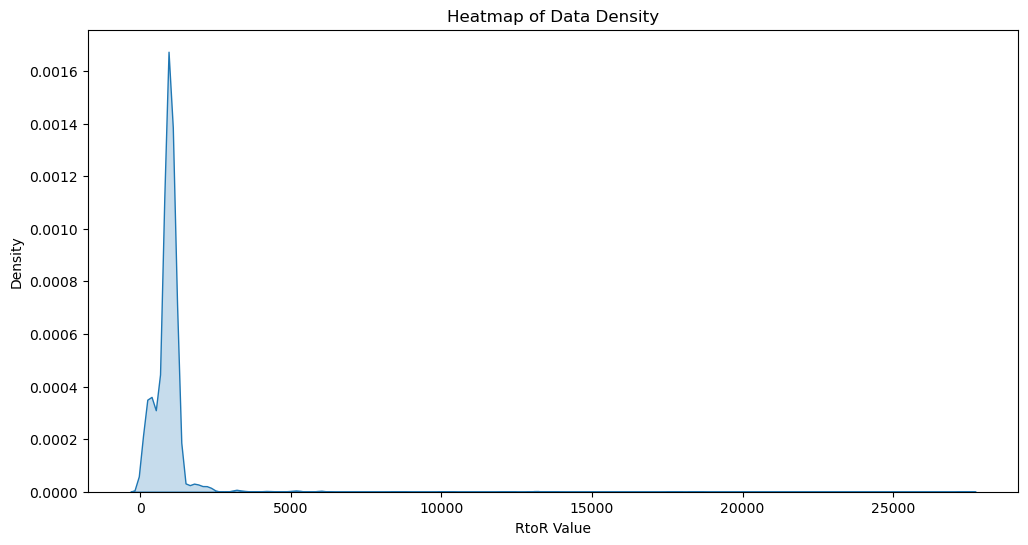

In [111]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a 2D histogram of the data points
data = df['RtoR'].dropna()  # Remove NaN values if they exist

# Step 2: Use seaborn to create a heatmap-like density plot
plt.figure(figsize=(12, 6))

# Create a heatmap of the data, adjusting the number of bins for granularity
sns.kdeplot(data, shade=True, cmap="Blues", bw_adjust=0.5)

# Title and labels
plt.title("Heatmap of Data Density")
plt.xlabel("RtoR Value")
plt.ylabel("Density")

# Show the plot
plt.show()


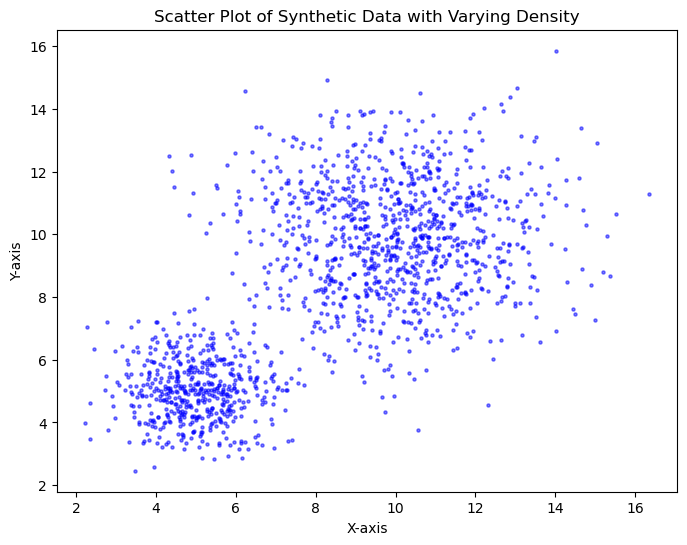

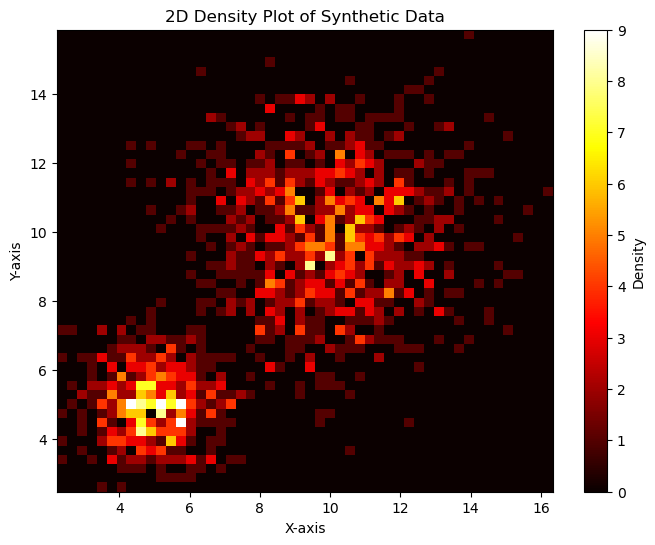

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
x = np.concatenate([np.random.normal(5, 1, 500), np.random.normal(10, 2, 1000)])
y = np.concatenate([np.random.normal(5, 1, 500), np.random.normal(10, 2, 1000)])

# Plot 1: Scatter plot of the original data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=5, alpha=0.5, color='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Synthetic Data with Varying Density')
plt.show()

# Plot 2: 2D density plot (heatmap)
plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=50, cmap='hot')
plt.colorbar(label='Density')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Density Plot of Synthetic Data')
plt.show()


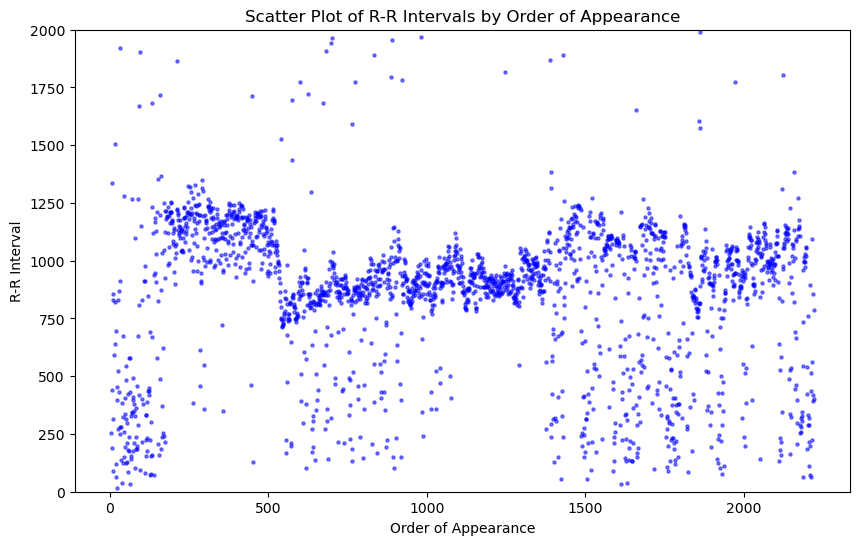

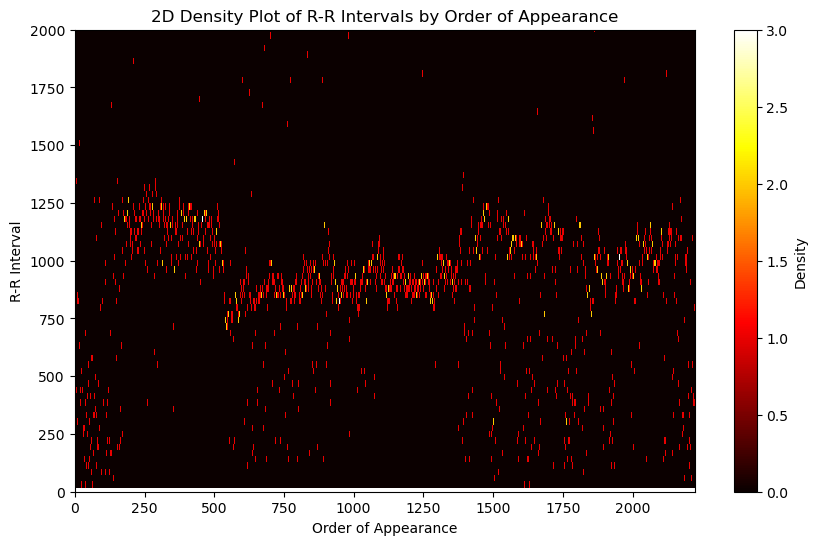

In [13]:
import pandas as pd
filename_1 = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"  
filename_2 = "YO_CLEANED/FMLV50W.txt"
dirty = pd.read_csv(filename_1)
#cleaned = pd.read_csv(filename_2, delim_whitespace=True)
#cleaned = pd.read_csv(filename_2, sep=r'\s+', engine='python', header =None)
data = dirty['RtoR'].dropna()


# Generate x-axis as the order of appearance
x = np.arange(len(data))

# Plot 1: Scatter plot of R-R intervals vs. order of appearance
plt.figure(figsize=(10, 6))
plt.scatter(x, data, s=5, alpha=0.5, color='blue')
plt.xlabel('Order of Appearance')
plt.ylabel('R-R Interval')
plt.ylim(0,2000)
plt.title('Scatter Plot of R-R Intervals by Order of Appearance')
plt.show()

# Plot 2: 2D Density plot (heatmap) along order of appearance
plt.figure(figsize=(10, 6))
plt.hist2d(x, data, bins=[1000, 1000], cmap='hot')
plt.colorbar(label='Density')
plt.xlabel('Order of Appearance')
plt.ylabel('R-R Interval')
plt.ylim(0,2000)
plt.title('2D Density Plot of R-R Intervals by Order of Appearance')
plt.show()

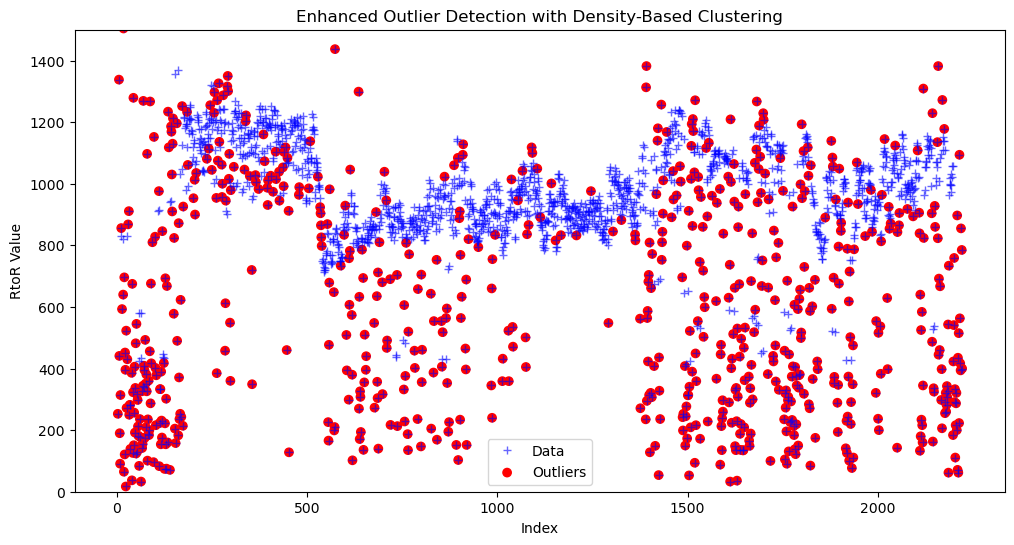

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# Assume `df['RtoR']` contains the R-R interval data
# df = pd.read_csv('your_data.csv')  # Replace with your actual data source

# Sample data generation for demonstration (replace with your data)
#np.random.seed(0)
#data = np.random.normal(1, 0.1, 1000)  # replace this with `df['RtoR'].values`
#df = pd.DataFrame({'RtoR': data * 1000})  # Adjust scale as needed

import pandas as pd
filename_1 = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"  
filename_2 = "YO_CLEANED/FMLV50W.txt"
dirty = pd.read_csv(filename_1)
#cleaned = pd.read_csv(filename_2, delim_whitespace=True)
#cleaned = pd.read_csv(filename_2, sep=r'\s+', engine='python', header =None)
df = dirty
# Step 1: Calculate z-scores for the 'RtoR' data
df['z_scores'] = zscore(df['RtoR'])

# Define an outlier threshold (±3 standard deviations)
z_threshold = 3

# Step 2: Use IQR to define bounds
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Combine z-score and IQR conditions to identify outliers
z_iqr_outliers = (df['z_scores'].abs() > z_threshold) | (df['RtoR'] < lower_bound) | (df['RtoR'] > upper_bound)

# Step 3: DBSCAN for Density-Based Outlier Detection
# Set up the data for clustering, with the order of appearance as x and the values as y
X = np.column_stack((np.arange(len(df['RtoR'])), df['RtoR']))

# DBSCAN parameters: eps defines "neighborhood size," min_samples is the minimum cluster size
db = DBSCAN(eps=15, min_samples=2).fit(X)
df['dbscan_labels'] = db.labels_

# Outliers are labeled as -1 in DBSCAN
dbscan_outliers = df['dbscan_labels'] == -1

# Step 4: Combine DBSCAN and z-score/IQR outliers
# We take union of outliers from both methods
df['combined_outliers'] = z_iqr_outliers | dbscan_outliers

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RtoR'], label="Data", color="blue", alpha=0.6, marker='+', linestyle='')
plt.scatter(df.index[df['combined_outliers']], df['RtoR'][df['combined_outliers']], 
            color="red", label="Outliers", marker='o', linestyle='')
plt.title("Enhanced Outlier Detection with Density-Based Clustering")
plt.xlabel("Index")
plt.ylabel("RtoR Value")
plt.ylim(0, 1500)
plt.legend()
plt.show()


In [25]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interactive

# Sample data generation for demonstration (replace with your data)
np.random.seed(0)
data = np.random.normal(1, 0.1, 1000)  # Replace this with `df['RtoR'].values`
df = pd.DataFrame({'RtoR': data * 1000})  # Adjust scale as needed




# Step 1: Calculate z-scores for the 'RtoR' data
df['z_scores'] = zscore(df['RtoR'])

# Define an outlier threshold (±3 standard deviations)
z_threshold = 3

# Step 2: Use IQR to define bounds
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

z_iqr_outliers = (df['z_scores'].abs() > z_threshold) | (df['RtoR'] < lower_bound) | (df['RtoR'] > upper_bound)

# Define the interactive plotting function
def plot_outliers(eps, min_samples):
    # Step 3: DBSCAN with dynamic parameters
    X = np.column_stack((np.arange(len(df['RtoR'])), df['RtoR']))
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    df['dbscan_labels'] = db.labels_

    dbscan_outliers = df['dbscan_labels'] == -1

    # Step 4: Combine DBSCAN and z-score/IQR outliers
    df['combined_outliers'] = z_iqr_outliers | dbscan_outliers

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['RtoR'], label="Data", color="blue", alpha=0.6, marker='+', linestyle='')
    plt.scatter(df.index[df['combined_outliers']], df['RtoR'][df['combined_outliers']], 
                color="red", label="Outliers", marker='o', linestyle='')
    plt.title("Enhanced Outlier Detection with Density-Based Clustering")
    plt.xlabel("Index")
    plt.ylabel("RtoR Value")
    plt.ylim(0, 1500)
    plt.legend()
    plt.show()

# Interactive widget with sliders
interactive_plot = interactive(
    plot_outliers,
    eps=widgets.FloatSlider(value=10, min=1, max=50, step=1, description="eps"),
    min_samples=widgets.IntSlider(value=5, min=1, max=50, step=1, description="min_samples")
)

# Display the interactive plot
interactive_plot


interactive(children=(FloatSlider(value=10.0, description='eps', max=50.0, min=1.0, step=1.0), IntSlider(value…

In [27]:
import pandas as pd
filename_1 = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"  
filename_2 = "YO_CLEANED/FMLV50W.txt"
dirty = pd.read_csv(filename_1)
#cleaned = pd.read_csv(filename_2, delim_whitespace=True)
#cleaned = pd.read_csv(filename_2, sep=r'\s+', engine='python', header =None)
df = dirty

# Step 1: Calculate z-scores for the 'RtoR' data
df['z_scores'] = zscore(df['RtoR'])

# Define an outlier threshold (±3 standard deviations)
z_threshold = 3

# Step 2: Use IQR to define bounds
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

z_iqr_outliers = (df['z_scores'].abs() > z_threshold) | (df['RtoR'] < lower_bound) | (df['RtoR'] > upper_bound)

# Define the interactive plotting function
def plot_outliers(eps, min_samples):
    # Step 3: DBSCAN with dynamic parameters
    X = np.column_stack((np.arange(len(df['RtoR'])), df['RtoR']))
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    df['dbscan_labels'] = db.labels_

    dbscan_outliers = df['dbscan_labels'] == -1

    # Step 4: Combine DBSCAN and z-score/IQR outliers
    df['combined_outliers'] = z_iqr_outliers | dbscan_outliers

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['RtoR'], label="Data", color="blue", alpha=0.6, marker='+', linestyle='')
    plt.scatter(df.index[df['combined_outliers']], df['RtoR'][df['combined_outliers']], 
                color="red", label="Outliers", marker='o', linestyle='')
    plt.title("Enhanced Outlier Detection with Density-Based Clustering")
    plt.xlabel("Index")
    plt.ylabel("RtoR Value")
    plt.ylim(0, 2000)
    plt.legend()
    plt.show()

# Interactive widget with sliders
interactive_plot = interactive(
    plot_outliers,
    eps=widgets.FloatSlider(value=10, min=1, max=50, step=1, description="eps"),
    min_samples=widgets.IntSlider(value=5, min=1, max=50, step=1, description="min_samples")
)

# Display the interactive plot
interactive_plot

interactive(children=(FloatSlider(value=10.0, description='eps', max=50.0, min=1.0, step=1.0), IntSlider(value…

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interactive

# Sample data generation for demonstration (replace with your actual data)
np.random.seed(0)
data = np.random.normal(1, 0.1, 1000)  # Original data (replace with `df['RtoR']`)
df = pd.DataFrame({'RtoR': data * 1000})

# Simulate df2 as a subset of cleaned data with a slight shift
shifted_data = np.random.normal(1, 0.1, 950)  # Adjust length as needed
df2 = pd.DataFrame({'RtoR': shifted_data * 1000})

# Step 1: Calculate z-scores for the 'RtoR' data in df
df['z_scores'] = zscore(df['RtoR'])

# Define an outlier threshold (±3 standard deviations)
z_threshold = 3

# Step 2: Use IQR to define bounds
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
z_iqr_outliers = (df['z_scores'].abs() > z_threshold) | (df['RtoR'] < lower_bound) | (df['RtoR'] > upper_bound)

# Define the interactive plotting function
def plot_outliers(eps, min_samples, shift):
    # Step 3: DBSCAN with dynamic parameters
    X = np.column_stack((np.arange(len(df['RtoR'])), df['RtoR']))
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    df['dbscan_labels'] = db.labels_

    dbscan_outliers = df['dbscan_labels'] == -1

    # Step 4: Combine DBSCAN and z-score/IQR outliers
    df['combined_outliers'] = z_iqr_outliers | dbscan_outliers

    # Shift df2 by the specified amount (shift can be negative or positive)
    shifted_index = np.arange(len(df2)) + shift
    df2_shifted = pd.DataFrame({'RtoR': df2['RtoR'].values}, index=shifted_index)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['RtoR'], label="Original Data", color="blue", alpha=0.6, marker='+', linestyle='')
    plt.scatter(df.index[df['combined_outliers']], df['RtoR'][df['combined_outliers']], 
                color="red", label="Outliers", marker='o', linestyle='')
    plt.plot(df2_shifted.index, df2_shifted['RtoR'], label="Cleaned Data (df2)", color="green", alpha=0.7, marker='x', linestyle='')

    # Plot settings
    plt.title("Enhanced Outlier Detection with Cleaned Data Overlay")
    plt.xlabel("Index")
    plt.ylabel("RtoR Value")
    plt.ylim(0, 1500)
    plt.legend()
    plt.show()

# Interactive widget with sliders
interactive_plot = interactive(
    plot_outliers,
    eps=widgets.FloatSlider(value=10, min=1, max=50, step=1, description="eps"),
    min_samples=widgets.IntSlider(value=5, min=1, max=50, step=1, description="min_samples"),
    shift=widgets.IntSlider(value=0, min=-50, max=50, step=1, description="Shift df2")
)

# Display the interactive plot
interactive_plot


interactive(children=(FloatSlider(value=10.0, description='eps', max=50.0, min=1.0, step=1.0), IntSlider(value…

In [33]:
import pandas as pd
filename_1 = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"  
filename_2 = "YO_CLEANED/FMLV50W.txt"
dirty = pd.read_csv(filename_1)
#cleaned = pd.read_csv(filename_2, delim_whitespace=True)
cleaned = pd.read_csv(filename_2, sep=r'\s+', engine='python', header =None)
df = dirty
df2 = cleaned


# Step 1: Calculate z-scores for the 'RtoR' data in df
df['z_scores'] = zscore(df['RtoR'])

# Define an outlier threshold (±3 standard deviations)
z_threshold = 3

# Step 2: Use IQR to define bounds
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
z_iqr_outliers = (df['z_scores'].abs() > z_threshold) | (df['RtoR'] < lower_bound) | (df['RtoR'] > upper_bound)

# Define the interactive plotting function
def plot_outliers(eps, min_samples, shift):
    # Step 3: DBSCAN with dynamic parameters
    X = np.column_stack((np.arange(len(df['RtoR'])), df['RtoR']))
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    df['dbscan_labels'] = db.labels_

    dbscan_outliers = df['dbscan_labels'] == -1

    # Step 4: Combine DBSCAN and z-score/IQR outliers
    df['combined_outliers'] = z_iqr_outliers | dbscan_outliers

    # Shift df2 by the specified amount (shift can be negative or positive)
    shifted_index = np.arange(len(df2)) + shift
    df2_shifted = pd.DataFrame({'RtoR': df2[1].values}, index=shifted_index)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['RtoR'], label="Original Data", color="blue", alpha=0.6, marker='+', linestyle='')
    plt.scatter(df.index[df['combined_outliers']], df['RtoR'][df['combined_outliers']], 
                color="red", label="Outliers", marker='o', linestyle='')
    plt.plot(df2_shifted.index, df2_shifted['RtoR'], label="Cleaned Data (df2)", color="green", alpha=0.7, marker='x', linestyle='')

    # Plot settings
    plt.title("Enhanced Outlier Detection with Cleaned Data Overlay")
    plt.xlabel("Index")
    plt.ylabel("RtoR Value")
    plt.ylim(0, 1500)
    plt.legend()
    plt.show()

# Interactive widget with sliders
interactive_plot = interactive(
    plot_outliers,
    eps=widgets.FloatSlider(value=10, min=1, max=50, step=1, description="eps"),
    min_samples=widgets.IntSlider(value=5, min=1, max=50, step=1, description="min_samples"),
    shift=widgets.IntSlider(value=0, min=50, max=150, step=1, description="Shift df2")
)

# Display the interactive plot
interactive_plot

interactive(children=(FloatSlider(value=10.0, description='eps', max=50.0, min=1.0, step=1.0), IntSlider(value…

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import DBSCAN
from ipywidgets import interactive, widgets

# Load data
filename_1 = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"
filename_2 = "YO_CLEANED/FMLV50W.txt"
dirty = pd.read_csv(filename_1)
cleaned = pd.read_csv(filename_2, sep=r'\s+', engine='python', header=None)
df = dirty
df2 = cleaned

# Step 1: Calculate z-scores for the 'RtoR' data in df
df['z_scores'] = zscore(df['RtoR'])

# Define an outlier threshold (±3 standard deviations)
z_threshold = 3

# Step 2: Use IQR to define bounds
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
z_iqr_outliers = (df['z_scores'].abs() > z_threshold) | (df['RtoR'] < lower_bound) | (df['RtoR'] > upper_bound)

# Define the interactive plotting function with density threshold
def plot_outliers(eps, min_samples, shift, density_window, density_threshold):
    # Step 3: DBSCAN with dynamic parameters
    X = np.column_stack((np.arange(len(df['RtoR'])), df['RtoR']))
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    df['dbscan_labels'] = db.labels_

    dbscan_outliers = df['dbscan_labels'] == -1

    # Step 4: Combine DBSCAN and z-score/IQR outliers
    df['combined_outliers'] = z_iqr_outliers | dbscan_outliers

    # Step 5: Calculate density of outliers using a sliding window
    density_outliers = df['combined_outliers'].rolling(window=density_window, center=True).mean()
    df['density_outliers'] = density_outliers > density_threshold

    # Shift df2 by the specified amount (shift can be negative or positive)
    shifted_index = np.arange(len(df2)) + shift
    df2_shifted = pd.DataFrame({'RtoR': df2[1].values}, index=shifted_index)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['RtoR'], label="Original Data", color="blue", alpha=0.6, marker='+', linestyle='')
    plt.scatter(df.index[df['combined_outliers']], df['RtoR'][df['combined_outliers']], 
                color="red", label="Outliers", marker='o', linestyle='')
    plt.scatter(df.index[df['density_outliers']], df['RtoR'][df['density_outliers']], 
                color="orange", label="High Density Outlier Region", marker='s', linestyle='')
    plt.plot(df2_shifted.index, df2_shifted['RtoR'], label="Cleaned Data (df2)", color="green", alpha=0.7, marker='x', linestyle='')

    # Plot settings
    plt.title("Enhanced Outlier Detection with Density Highlighting")
    plt.xlabel("Index")
    plt.ylabel("RtoR Value")
    plt.ylim(0, 1500)
    plt.legend()
    plt.show()

# Interactive widget with sliders for density parameters
interactive_plot = interactive(
    plot_outliers,
    eps=widgets.FloatSlider(value=10, min=1, max=50, step=1, description="eps"),
    min_samples=widgets.IntSlider(value=5, min=1, max=50, step=1, description="min_samples"),
    shift=widgets.IntSlider(value=0, min=-150, max=150, step=1, description="Shift df2"),
    density_window=widgets.IntSlider(value=10, min=1, max=100, step=1, description="Density Window"),
    density_threshold=widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description="Density Threshold")
)

# Display the interactive plot
interactive_plot


interactive(children=(FloatSlider(value=10.0, description='eps', max=50.0, min=1.0, step=1.0), IntSlider(value…

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans
from ipywidgets import interactive, widgets

# Load data
filename_1 = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"
filename_2 = "YO_CLEANED/FMLV50W.txt"
dirty = pd.read_csv(filename_1)
cleaned = pd.read_csv(filename_2, sep=r'\s+', engine='python', header=None)
df = dirty
df2 = cleaned

# Step 1: Calculate z-scores for the 'RtoR' data in df
df['z_scores'] = zscore(df['RtoR'])

# Define an outlier threshold (±3 standard deviations)
z_threshold = 3

# Step 2: Use IQR to define bounds
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
z_iqr_outliers = (df['z_scores'].abs() > z_threshold) | (df['RtoR'] < lower_bound) | (df['RtoR'] > upper_bound)

# Define the interactive plotting function with K-means outlier detection
def plot_outliers(k_clusters, shift, distance_threshold):
    # Step 3: Apply K-means clustering with k_clusters
    X = np.column_stack((np.arange(len(df['RtoR'])), df['RtoR']))
    kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(X)
    df['kmeans_labels'] = kmeans.labels_
    df['kmeans_distances'] = np.linalg.norm(X - kmeans.cluster_centers_[kmeans.labels_], axis=1)

    # Mark outliers based on distance from cluster centroid
    kmeans_outliers = df['kmeans_distances'] > distance_threshold

    # Step 4: Combine previous methods and K-means outliers
    df['combined_outliers'] = z_iqr_outliers | kmeans_outliers

    # Shift df2 by the specified amount (shift can be negative or positive)
    shifted_index = np.arange(len(df2)) + shift
    df2_shifted = pd.DataFrame({'RtoR': df2[1].values}, index=shifted_index)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['RtoR'], label="Original Data", color="blue", alpha=0.6, marker='+', linestyle='')
    plt.scatter(df.index[df['combined_outliers']], df['RtoR'][df['combined_outliers']], 
                color="red", label="Outliers", marker='o', linestyle='')
    plt.plot(df2_shifted.index, df2_shifted['RtoR'], label="Cleaned Data (df2)", color="green", alpha=0.7, marker='x', linestyle='')

    # Plot settings
    plt.title("Enhanced Outlier Detection with K-means")
    plt.xlabel("Index")
    plt.ylabel("RtoR Value")
    plt.ylim(0, 1500)
    plt.legend()
    plt.show()

# Interactive widget with sliders for K-means parameters
interactive_plot = interactive(
    plot_outliers,
    k_clusters=widgets.IntSlider(value=10, min=2, max=50, step=1, description="K Clusters"),
    shift=widgets.IntSlider(value=0, min=-150, max=150, step=1, description="Shift df2"),
    distance_threshold=widgets.FloatSlider(value=50, min=1, max=500, step=5, description="Distance Threshold")
)

# Display the interactive plot
interactive_plot


interactive(children=(IntSlider(value=10, description='K Clusters', max=50, min=2), IntSlider(value=0, descrip…

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import DBSCAN
from ipywidgets import interactive, widgets

# Load your data
filename_1 = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"  
filename_2 = "YO_CLEANED/FMLV50W.txt"
dirty = pd.read_csv(filename_1)
cleaned = pd.read_csv(filename_2, sep=r'\s+', engine='python', header=None)
df = dirty
df2 = cleaned

# Step 1: Calculate z-scores for the 'RtoR' data in df
df['z_scores'] = zscore(df['RtoR'])

# Define an outlier threshold (±3 standard deviations)
z_threshold = 3

# Step 2: Use IQR to define bounds
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
z_iqr_outliers = (df['z_scores'].abs() > z_threshold) | (df['RtoR'] < lower_bound) | (df['RtoR'] > upper_bound)

# Define the interactive plotting function
def plot_with_lines(eps, min_samples, shift, hline1, hline2, vline1, vline2):
    # Step 3: DBSCAN with dynamic parameters
    X = np.column_stack((np.arange(len(df['RtoR'])), df['RtoR']))
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    df['dbscan_labels'] = db.labels_

    dbscan_outliers = df['dbscan_labels'] == -1

    # Step 4: Combine DBSCAN and z-score/IQR outliers
    df['combined_outliers'] = z_iqr_outliers | dbscan_outliers

    # Shift df2 by the specified amount (shift can be negative or positive)
    shifted_index = np.arange(len(df2)) + shift
    df2_shifted = pd.DataFrame({'RtoR': df2[1].values}, index=shifted_index)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['RtoR'], label="Original Data", color="blue", alpha=0.6, marker='+', linestyle='')
    plt.scatter(df.index[df['combined_outliers']], df['RtoR'][df['combined_outliers']], 
                color="red", label="Outliers", marker='o', linestyle='')
    plt.plot(df2_shifted.index, df2_shifted['RtoR'], label="Cleaned Data (df2)", color="green", alpha=0.7, marker='x', linestyle='')

    # Add horizontal lines
    plt.axhline(y=hline1, color='purple', linestyle='--', label=f'Horizontal Line 1 ({hline1})')
    plt.axhline(y=hline2, color='orange', linestyle='--', label=f'Horizontal Line 2 ({hline2})')
    
    # Add vertical lines
    plt.axvline(x=vline1, color='gray', linestyle='--', label=f'Vertical Line 1 ({vline1})')
    plt.axvline(x=vline2, color='brown', linestyle='--', label=f'Vertical Line 2 ({vline2})')

    # Highlight the region between the vertical lines
    plt.axvspan(vline1, vline2, color='yellow', alpha=0.1, label='Selected Region')

    # Plot settings
    plt.title("Outlier Detection with Interactive Lines")
    plt.xlabel("Index")
    plt.ylabel("RtoR Value")
    plt.ylim(0, 1500)
    plt.legend()
    plt.show()

# Interactive widget with sliders
interactive_plot = interactive(
    plot_with_lines,
    eps=widgets.FloatSlider(value=10, min=1, max=50, step=1, description="eps"),
    min_samples=widgets.IntSlider(value=5, min=1, max=50, step=1, description="min_samples"),
    shift=widgets.IntSlider(value=0, min=-50, max=150, step=1, description="Shift df2"),
    hline1=widgets.FloatSlider(value=200, min=0, max=1500, step=10, description="H-Line 1"),
    hline2=widgets.FloatSlider(value=1000, min=0, max=1500, step=10, description="H-Line 2"),
    vline1=widgets.IntSlider(value=100, min=0, max=len(df)-1, step=1, description="V-Line 1"),
    vline2=widgets.IntSlider(value=300, min=0, max=len(df)-1, step=1, description="V-Line 2")
)

# Display the interactive plot
interactive_plot


interactive(children=(FloatSlider(value=10.0, description='eps', max=50.0, min=1.0, step=1.0), IntSlider(value…

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import DBSCAN
from ipywidgets import interactive, widgets

# Load your data
filename = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"
df = pd.read_csv(filename)

# Step 1: Calculate z-scores for the 'RtoR' data in df
df['z_scores'] = zscore(df['RtoR'])

# Define an outlier threshold (±3 standard deviations)
z_threshold = 3

# Step 2: Use IQR to define bounds
Q1 = df['RtoR'].quantile(0.25)
Q3 = df['RtoR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
z_iqr_outliers = (df['z_scores'].abs() > z_threshold) | (df['RtoR'] < lower_bound) | (df['RtoR'] > upper_bound)

# Define the interactive plotting function
def plot_with_lines(eps, min_samples, hline1, hline2, vline1, vline2):
    # Step 3: DBSCAN with dynamic parameters
    X = np.column_stack((np.arange(len(df['RtoR'])), df['RtoR']))
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    df['dbscan_labels'] = db.labels_

    dbscan_outliers = df['dbscan_labels'] == -1

    # Step 4: Combine DBSCAN and z-score/IQR outliers
    df['combined_outliers'] = z_iqr_outliers | dbscan_outliers

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['RtoR'], label="Original Data", color="blue", alpha=0.6, marker='+', linestyle='')
    plt.scatter(df.index[df['combined_outliers']], df['RtoR'][df['combined_outliers']], 
                color="red", label="Outliers", marker='o', linestyle='')

    # Add horizontal lines
    plt.axhline(y=hline1, color='purple', linestyle='--', label=f'Horizontal Line 1 ({hline1})')
    plt.axhline(y=hline2, color='orange', linestyle='--', label=f'Horizontal Line 2 ({hline2})')
    
    # Add vertical lines
    plt.axvline(x=vline1, color='gray', linestyle='--', label=f'Vertical Line 1 ({vline1})')
    plt.axvline(x=vline2, color='brown', linestyle='--', label=f'Vertical Line 2 ({vline2})')

    # Highlight the region between the vertical lines
    plt.axvspan(vline1, vline2, color='yellow', alpha=0.1, label='Selected Region')

    # Plot settings
    plt.title("Outlier Detection with Interactive Lines")
    plt.xlabel("Index")
    plt.ylabel("RtoR Value")
    plt.ylim(0, 1500)
    plt.legend()
    plt.show()

# Interactive widget with sliders
interactive_plot = interactive(
    plot_with_lines,
    eps=widgets.FloatSlider(value=10, min=1, max=50, step=1, description="eps"),
    min_samples=widgets.IntSlider(value=5, min=1, max=50, step=1, description="min_samples"),
    hline1=widgets.FloatSlider(value=200, min=0, max=1500, step=10, description="H-Line 1"),
    hline2=widgets.FloatSlider(value=1000, min=0, max=1500, step=10, description="H-Line 2"),
    vline1=widgets.IntSlider(value=100, min=0, max=len(df)-1, step=1, description="V-Line 1"),
    vline2=widgets.IntSlider(value=300, min=0, max=len(df)-1, step=1, description="V-Line 2")
)

# Display the interactive plot
interactive_plot


interactive(children=(FloatSlider(value=10.0, description='eps', max=50.0, min=1.0, step=1.0), IntSlider(value…